In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import json

def convert_to_list_sorted_by_keys(stats: dict):
    stats_list = [(int(key), value[:2]) for key, value in stats.items()]

    return sorted(stats_list, key=lambda entry: entry[0])

def main():
    stats1 = json.loads(Path('tmp/stats_195k.json').read_text())
    stats2 = json.loads(Path('tmp/stats_final.json').read_text())

    stats1 = convert_to_list_sorted_by_keys(stats1)
    stats2 = convert_to_list_sorted_by_keys(stats2)

    stats1_last_batch_num = stats1[-1][0]
    batches = [entry[0] for entry in stats1]
    batches.extend([entry[0] + stats1_last_batch_num for entry in stats2])
    train_losses = [entry[1][0] for entry in stats1]
    train_losses.extend([entry[1][0] for entry in stats2])
    val_losses = [entry[1][1] for entry in stats1]
    val_losses.extend([entry[1][1] for entry in stats2])
    
    # Increase the size of the plot
    plt.figure(figsize=(16, 10))  # You can adjust the dimensions as needed

    plt.plot(batches, train_losses, label='Training')
    plt.plot(batches, val_losses, label='Validation')
    plt.xlabel('n batches')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

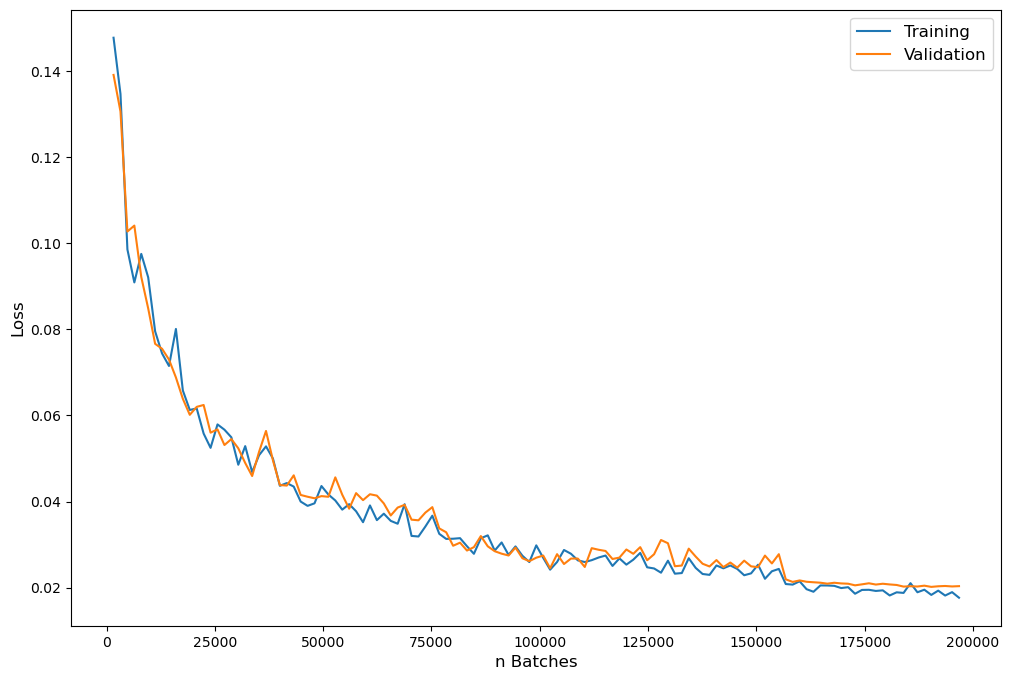

In [15]:
stats1 = json.loads(Path('tmp/stats_195k.json').read_text())

stats1 = convert_to_list_sorted_by_keys(stats1)

stats1_last_batch_num = stats1[-1][0]
batches = [entry[0] for entry in stats1]
train_losses = [entry[1][0] for entry in stats1]
val_losses = [entry[1][1] for entry in stats1]

# Increase the size of the plot
plt.figure(figsize=(12, 8))

plt.plot(batches, train_losses, label='Training')
plt.plot(batches, val_losses, label='Validation')

# vertical line
# plt.axvline(x=stats1_last_batch_num, color='r', linestyle='--', linewidth=1, label='Start of second file')

plt.xlabel('n batches')
plt.ylabel('Loss')
plt.legend()

# Adjust the legend size here using the fontsize parameter
plt.legend(fontsize='large')  # You can specify 'small', 'medium', 'large', or use numeric values for size

# Setting larger font sizes for the labels and title
plt.xlabel('n Batches', fontsize=12)
plt.ylabel('Loss', fontsize=12)

plt.show()

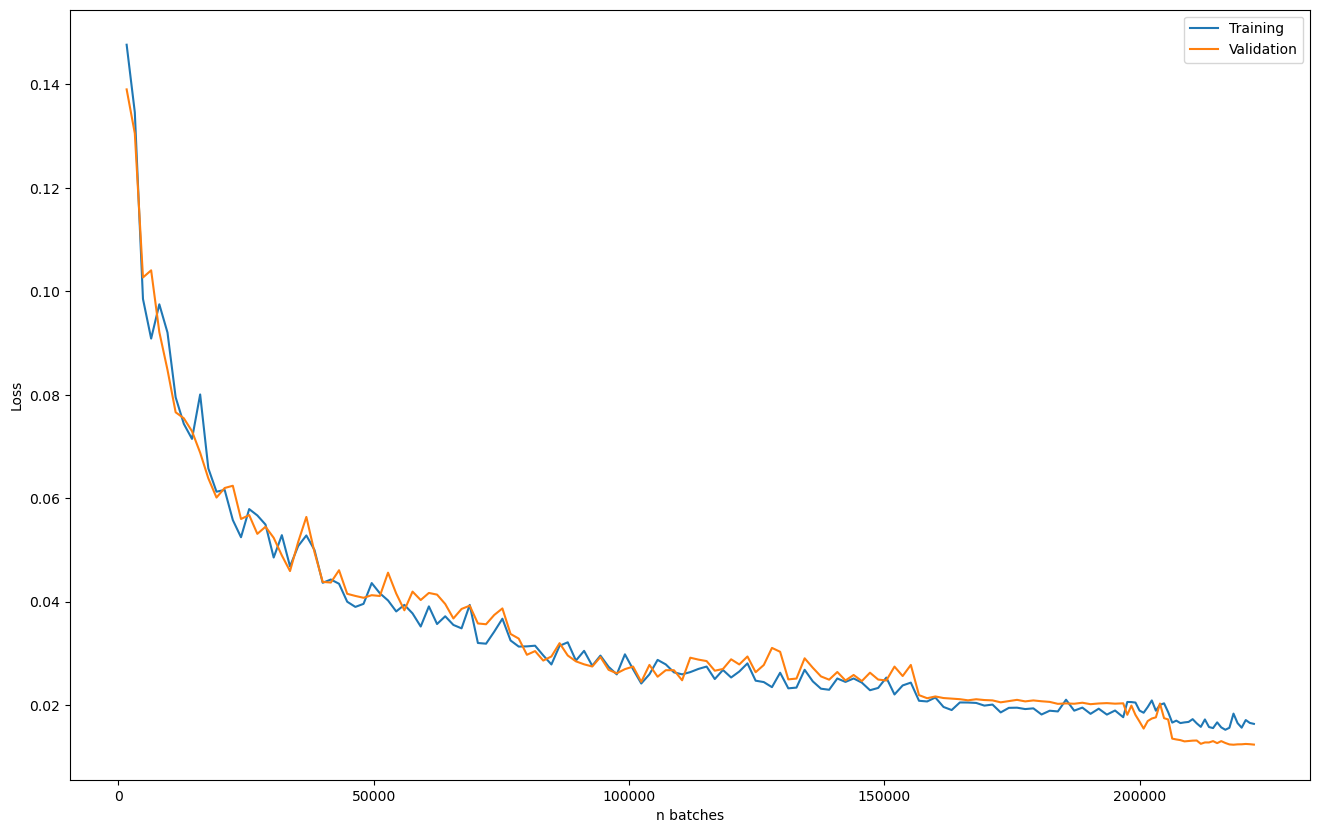

In [2]:
stats1 = json.loads(Path('tmp/stats_195k.json').read_text())
stats2 = json.loads(Path('tmp/stats_final.json').read_text())

stats1 = convert_to_list_sorted_by_keys(stats1)
stats2 = convert_to_list_sorted_by_keys(stats2)

stats1_last_batch_num = stats1[-1][0]
batches = [entry[0] for entry in stats1]
batches.extend([entry[0] + stats1_last_batch_num for entry in stats2])
train_losses = [entry[1][0] for entry in stats1]
train_losses.extend([entry[1][0] for entry in stats2])
val_losses = [entry[1][1] for entry in stats1]
val_losses.extend([entry[1][1] for entry in stats2])

# Increase the size of the plot
plt.figure(figsize=(16, 10))

plt.plot(batches, train_losses, label='Training')
plt.plot(batches, val_losses, label='Validation')

# vertical line
# plt.axvline(x=stats1_last_batch_num, color='r', linestyle='--', linewidth=1, label='Start of second file')

plt.xlabel('n batches')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plot for the report

In [26]:
stats1 = json.loads(Path('tmp/stats_195k.json').read_text())
stats1 = convert_to_list_sorted_by_keys(stats1)

In [29]:
import numpy as np

train_mean_first_pass = np.mean([i[1][0] for i in stats1[-10:]])
train_mean_first_pass

0.018960158545814922

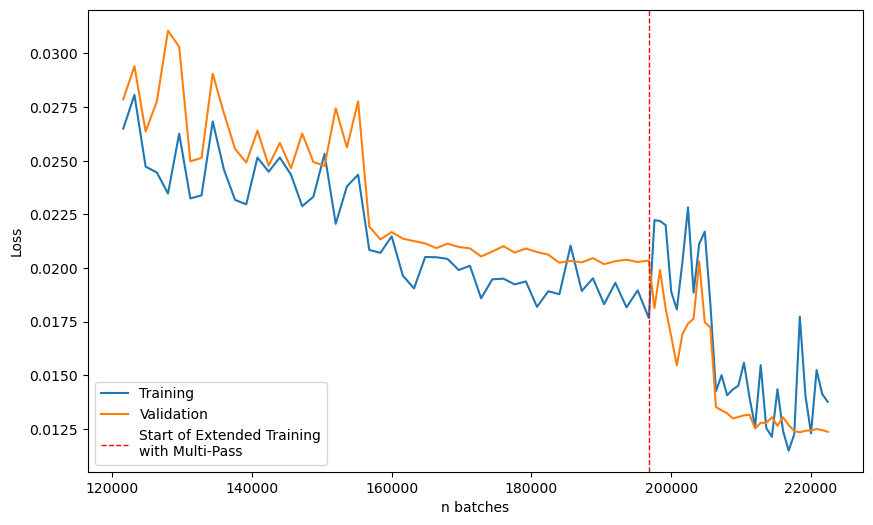

In [45]:
train_mean_first_pass = np.mean([i[1][0] for i in stats1[-8:]])

def main():
    stats1 = json.loads(Path('tmp/stats_195k.json').read_text())
    stats2 = json.loads(Path('tmp/stats_final.json').read_text())

    stats1 = convert_to_list_sorted_by_keys(stats1)
    stats2 = convert_to_list_sorted_by_keys(stats2)

    stats1_last_batch_num = stats1[-1][0]
    batches = [entry[0] for entry in stats1]
    batches.extend([entry[0] + stats1_last_batch_num for entry in stats2])
    train_losses = [entry[1][0] for entry in stats1]
    train_losses.extend([2*entry[1][0]-train_mean_first_pass for entry in stats2])
    # train_losses.extend([entry[1][0] for entry in stats2])
    val_losses = [entry[1][1] for entry in stats1]
    val_losses.extend([entry[1][1] for entry in stats2])

    # Filter out values less than 150000 on the x-axis
    filtered_batches = [b for b in batches if b > 120000]
    filtered_train_losses = [train_losses[i] for i, b in enumerate(batches) if b > 120000]
    filtered_val_losses = [val_losses[i] for i, b in enumerate(batches) if b > 120000]

    plt.figure(figsize=(10, 6))

    plt.plot(filtered_batches, filtered_train_losses, label='Training')
    plt.plot(filtered_batches, filtered_val_losses, label='Validation')

    # Adding a vertical line at the point where the second file starts with a thinner line
    plt.axvline(x=stats1_last_batch_num, color='r', linestyle='--', linewidth=1, label='Start of Extended Training\nwith Multi-Pass')

    plt.xlabel('n batches')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

main()